## Import Libraries

In [1]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
df_50_Startups = pd.read_csv('50_Startups.csv')

In [4]:
df_50_Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df_50_Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df_50_Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df_50_Startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## Exploratory Data Analysis(EDA)

### Data Visualization

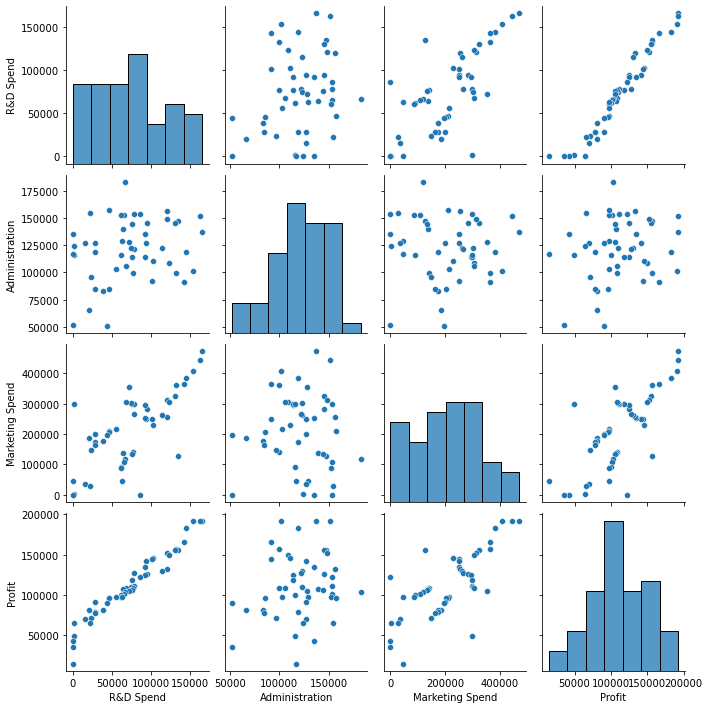

In [8]:
sns.pairplot(df_50_Startups)

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

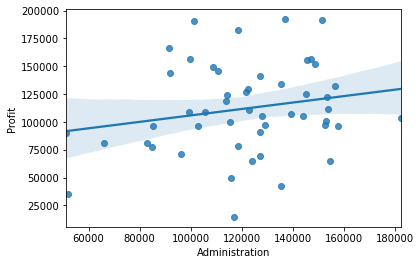

In [9]:
sns.regplot(x = 'Administration', y = 'Profit', data = df_50_Startups)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

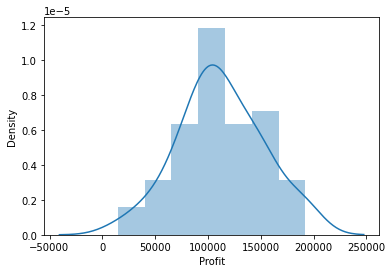

In [10]:
sns.distplot(df_50_Startups['Profit'])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

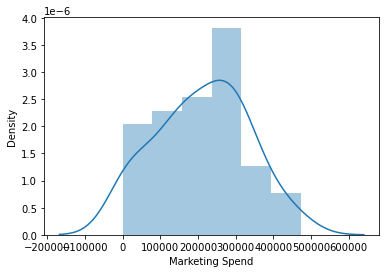

In [11]:
sns.distplot(df_50_Startups['Marketing Spend'])

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

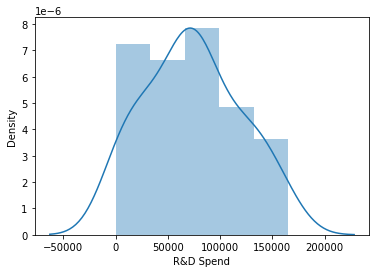

In [12]:
sns.distplot(df_50_Startups['R&D Spend'])

<AxesSubplot:>

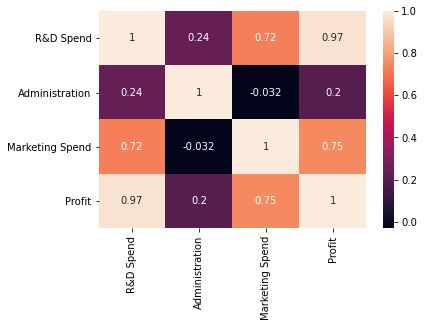

In [13]:
sns.heatmap(df_50_Startups.corr(), annot = True)

## Training A MultiLinear Regression Model

#### X And Y Arrays

In [14]:
X = df_50_Startups[['R&D Spend', 'Administration', 'Marketing Spend']]

y = df_50_Startups['Profit']

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Creating And Training Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [20]:
# Print the intercept
print(lm.intercept_)

56246.34551519442


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.800186
Administration,-0.085538
Marketing Spend,0.030326


## Predictions From Our Model

In [22]:
predictions = lm.predict(X_test)

### Data Visualization

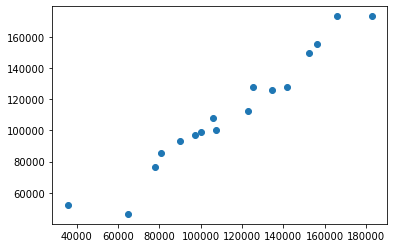

In [23]:
plt.scatter(y_test,predictions)

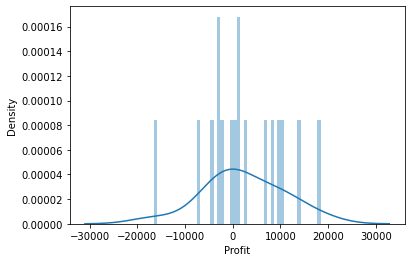

In [24]:
# Residual Histogram
sns.distplot((y_test-predictions),bins=50);

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6503.356192847066
MSE: 72256907.00309326
RMSE: 8500.40628458977
